In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# EDA

In [25]:
global_df =pd.read_csv('GlobalTemperatures.csv')

In [120]:
global_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year_year,year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750-01,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750-02,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750-03,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750-04,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750-05,1750
...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015-08,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015-09,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015-10,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015-11,2015


In [33]:
global_df.loc[:, ['dt', 'LandAverageTemperature']].head()


,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [36]:
global_df.LandAverageTemperature.describe()

404.39597386285004

In [116]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
 9   year_year          

In [50]:
#covert to datetime
global_df['dt'] = pd.to_datetime(global_df['dt'])


In [73]:
#GROUP BY YEAR
global_df['year'] = global_df ['dt'].apply(lambda x: x.strftime('%Y'))

In [101]:
global_trend = global_df.groupby('year').sum() ['LandAverageTemperature'].reset_index()

In [102]:
global_trend

,year,LandAverageTemperature
0,1750,95.913
1,1751,55.833
2,1752,34.679
3,1753,100.657
4,1754,101.632
...,...,...
261,2011,114.192
262,2012,114.088
263,2013,115.278
264,2014,114.848


# AVERAGE LAND TEMPERATURE TREND FROM (1750-2015) 

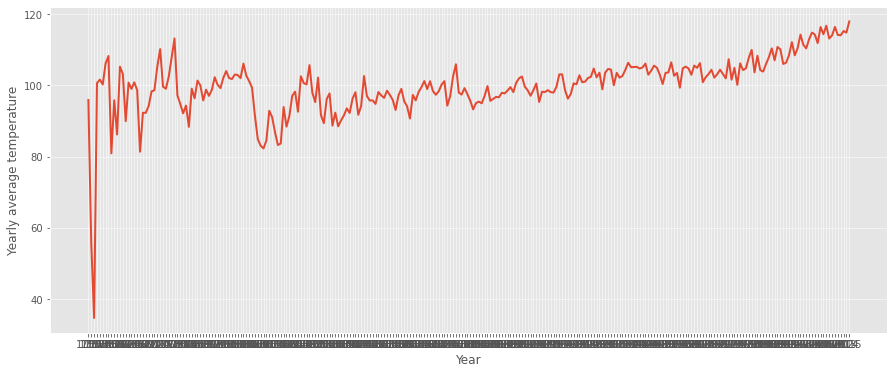

In [110]:

plt.style.use('ggplot')
plt.figure(figsize=(15,6))
plt.plot(global_trend['year'], global_trend['LandAverageTemperature'])
plt.ylabel('Yearly average temperature')
plt.xlabel('Year')
plt.show()


In [129]:
global_df = global_df.drop(['year_year'], axis =1)